In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
windgenDE = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

windgenFR = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('FR_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

In [3]:
windspeedDE = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

windspeedFR = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('FR_windspeed')),
                parse_dates=[0], index_col=0)

In [4]:
start_remove = pd.to_datetime('2016-01-01', utc = True)
end_remove = pd.to_datetime('2017-01-01', utc = True)

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)

In [5]:
windspeedtrainFR = windspeedFR.loc[(windspeedFR.index >= start_remove) & (windspeedFR.index < end_remove)]
windgenerationtrainFR = windgenFR.loc[(windgenFR.index >= start_remove) & (windgenFR.index < end_remove)]

windspeedtestFR = windspeedFR.loc[(windspeedFR.index >= start_test) & (windspeedFR.index < end_test)]
windgenerationtestFR = windgenFR.loc[(windgenFR.index >= start_test) & (windgenFR.index < end_test)]

In [6]:
windspeedtrainDE = windspeedDE.loc[(windspeedDE.index >= start_remove) & (windspeedDE.index < end_remove)]
windgenerationtrainDE = windgenDE.loc[(windgenDE.index >= start_remove) & (windgenDE.index < end_remove)]

windspeedtestDE = windspeedDE.loc[(windspeedDE.index >= start_test) & (windspeedDE.index < end_test)]
windgenerationtestDE = windgenDE.loc[(windgenDE.index >= start_test) & (windgenDE.index < end_test)]

In [7]:
windgenerationtrainDE = windgenerationtrainDE * 1e-3 /3496606 
#Germany's GDP for 2016

In [8]:
windgenerationtestFR = windgenerationtestFR * 1e-3

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [10]:
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [11]:
model = LinearRegression().fit(windspeedtrainDE,windgenerationtrainDE)

(8760, 1)
(8784, 1)


In [13]:
prediction = model.predict(windspeedtestFR)

In [14]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

C:\Users\ezhu2\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


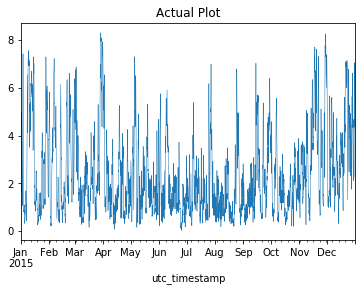

In [15]:
windgenerationtestFR.plot(linewidth=0.5, title='Actual Plot', legend=False)

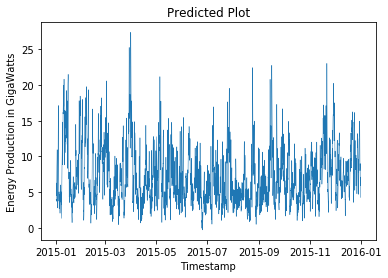

In [16]:
#plotting the predicted values
prediction = prediction * 2466152
#France's GDP in 2016
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [17]:
print(r2_score(windgenerationtestFR, prediction))

-9.215042005364516


In [18]:
print(mean_squared_error(windgenerationtestFR, prediction))

31.513329737645346


In [19]:
energy_production(windgenerationtestFR)

Energy Data measured in Giga Watts
Total energy: FR_wind_onshore_generation_actual    21090.859
dtype: float64
Average Energy Per Hour: FR_wind_onshore_generation_actual    2.407632
dtype: float64
Average Energy Per Day: FR_wind_onshore_generation_actual    57.783175
dtype: float64


In [20]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 64361.23965496241
Average Energy Per Hour: 7.347173476593882
Average Energy Per Day: 176.3321634382532
